### Instalasi Library yang Diperlukan

In [1]:
!pip install Flask
!pip install pyngrok
!pip install matplotlib
!pip install scikit-surprise


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 5.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357229 sha256=dc80873ff41c45453c23d27b9fc59e01e573c0d353264abddcc5ad6bf83df962
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


### Memuat dan Memproses Dataset


> Memuat dataset dan menggabungkan kolom teks relevan.





In [3]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Memuat dataset
file_path = '/content/sample_data/dataset.csv'  # Ubah jalur ini sesuai dengan jalur dataset Anda di Colab
data = pd.read_csv(file_path, encoding='latin1')

In [4]:
# Tampilkan beberapa baris pertama dari dataset
print(data.head())

   id                  judul               daerah-asal  \
0   1              Atu Belah  Nanggroe Aceh Darussalam   
1   2     Pangeran Amat Mude  Nanggroe Aceh Darussalam   
2   3   Kisah Si Raja Parkit  Nanggroe Aceh Darussalam   
3   4  Terjadinya Danau Toba  Nanggroe Aceh Darussalam   
4   5             Putri Ular            Sumatera Utara   

                                            overview  \
0  Sebuah keluarga miskin di Tanah Gayo mengalami...   
1  Pangeran Amat Mude, setelah menghadapi berbaga...   
2  Seorang raja burung parkit memimpin kelompokny...   
3  Seorang pemuda yang menemukan ikan emas besar ...   
4  Sebuah kisah tentang seorang putri cantik yang...   

                     karakter-utama          penulis  \
0         ['Ibu', 'Ayah', 'Sulung']       Azka Press   
1   ['Pangeran Amat Mude', 'Paman']   Dian Kristiani   
2                   ['Raja Parkit']    Ari Wulandari   
3  ['Pemuda', 'Gadis Jelmaan Ikan']  Dede Firmansyah   
4                         ['Putri'

In [5]:
# Menggabungkan kolom teks relevan menjadi satu kolom teks untuk TF-IDF
data['combined_features'] = data.apply(lambda row: ' '.join(row.astype(str)), axis=1)

In [6]:
# Inisialisasi TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english')

In [7]:
# Fit dan transformasi data
tfidf_matrix = tfidf.fit_transform(data['combined_features'])

In [8]:
# Hitung matriks kemiripan kosinus
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [9]:
# Tampilkan bentuk matriks kemiripan kosinus
print(cosine_sim.shape)

(100, 100)


### Implementasi Fungsi Rekomendasi dengan Filtering


> Mendefinisikan fungsi untuk mendapatkan rekomendasi dan menambahkan fitur filtering berdasarkan genre.



In [10]:
def get_recommendations(title, genre_filter=None, cosine_sim=cosine_sim):
    idx = data[data['judul'] == title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:]  # Exclude the input item itself

    if genre_filter:
        sim_scores = [(i, score) for i, score in sim_scores if genre_filter.lower() in data.iloc[i]['genre'].lower()]

    sim_scores = sim_scores[:10]  # Ambil 10 item yang paling mirip
    item_indices = [i[0] for i in sim_scores]
    return data['judul'].iloc[item_indices]

In [11]:
# Contoh mendapatkan rekomendasi dengan filtering
print(get_recommendations('Atu Belah', genre_filter='Legenda'))

71           Legenda Putri Duyung
52                  Batu Menangis
64          Legenda Pesut Mahakam
3           Terjadinya Danau Toba
48                     Batu Golog
60    Legenda Gunung Batu Bangkai
6                   Malin Kundang
1              Pangeran Amat Mude
66                Nyapu dan Moret
94           Asal-usul Nama Irian
Name: judul, dtype: object


### Visualisasi Buku Berdasarkan Penulis

> Membuat plot batang untuk menampilkan jumlah buku oleh setiap penulis.



In [12]:
import matplotlib.pyplot as plt

def plot_books_by_author():
    author_counts = data['penulis'].value_counts()
    plt.figure(figsize=(12, 6))
    author_counts.plot(kind='bar', color='skyblue')
    plt.xlabel('Penulis')
    plt.ylabel('Jumlah Buku')
    plt.title('Distribusi Buku oleh Penulis')
    plt.xticks(rotation=45, ha='right')
    plt.show()

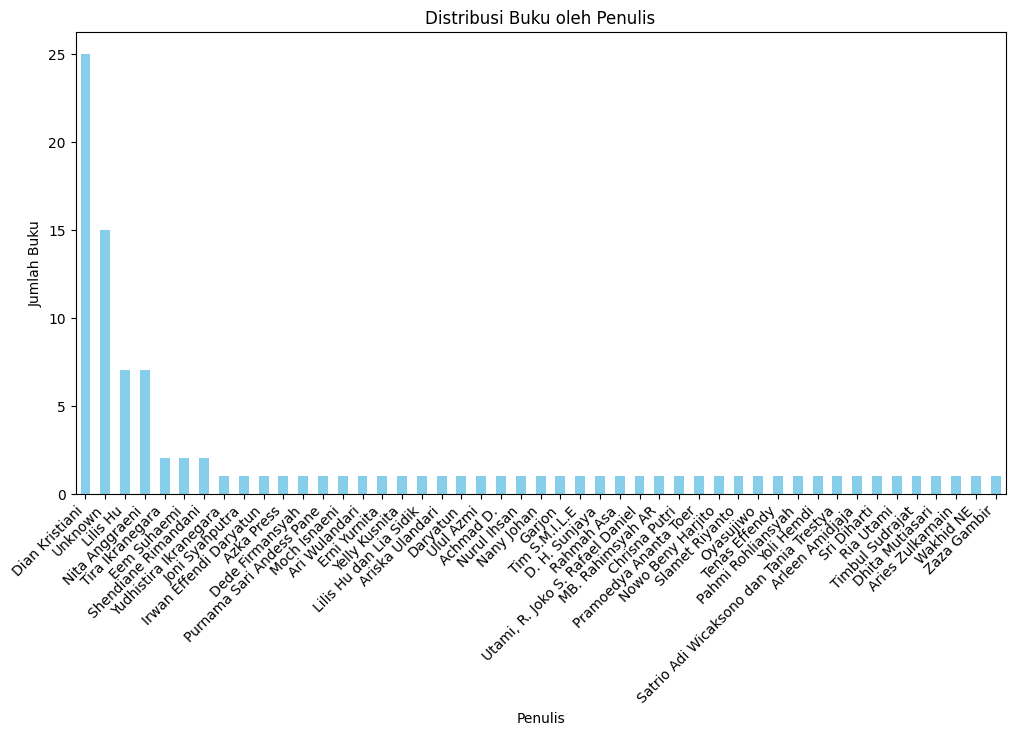

In [13]:
# Contoh plot
plot_books_by_author()

### Visualisasi Buku Berdasarkan Tema

> Membuat plot batang untuk menampilkan jumlah buku berdasarkan tema.




In [14]:
def plot_books_by_theme():
    # Menghitung jumlah buku berdasarkan tema
    theme_counts = data['tema'].apply(lambda x: len(eval(x)) if isinstance(x, str) else 0)
    theme_counts = theme_counts.value_counts()
    plt.figure(figsize=(12, 6))
    theme_counts.plot(kind='bar', color='lightgreen')
    plt.xlabel('Jumlah Tema')
    plt.ylabel('Jumlah Buku')
    plt.title('Distribusi Buku berdasarkan Jumlah Tema')
    plt.xticks(rotation=0)
    plt.show()

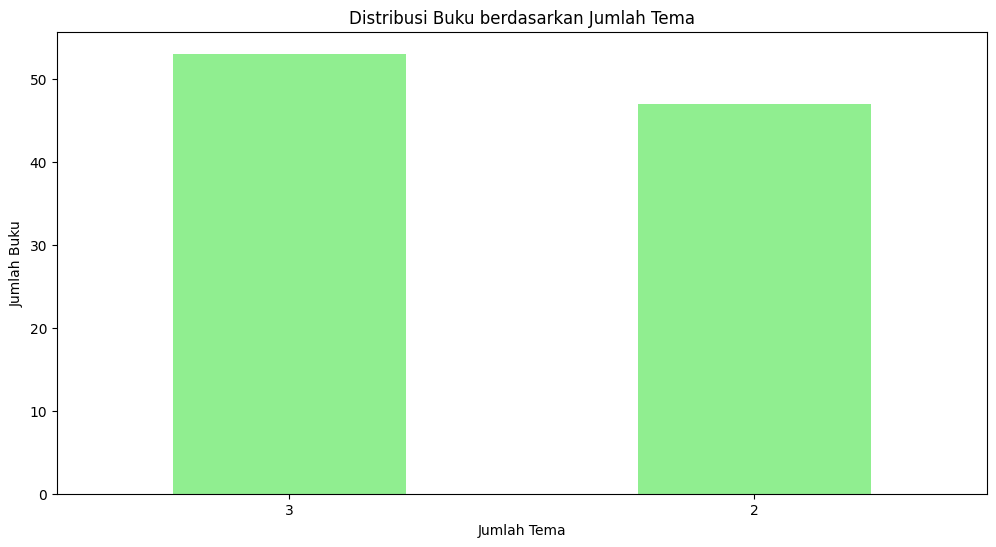

In [15]:
# Contoh plot
plot_books_by_theme()

### Visualisasi Judul Buku

> Membuat plot batang untuk menampilkan semua judul buku.



In [16]:
def plot_books_by_title():
    plt.figure(figsize=(12, 6))
    data['judul'].value_counts().plot(kind='bar', color='salmon')
    plt.xlabel('Judul Buku')
    plt.ylabel('Jumlah')
    plt.title('Distribusi Judul Buku')
    plt.xticks(rotation=90)
    plt.show()


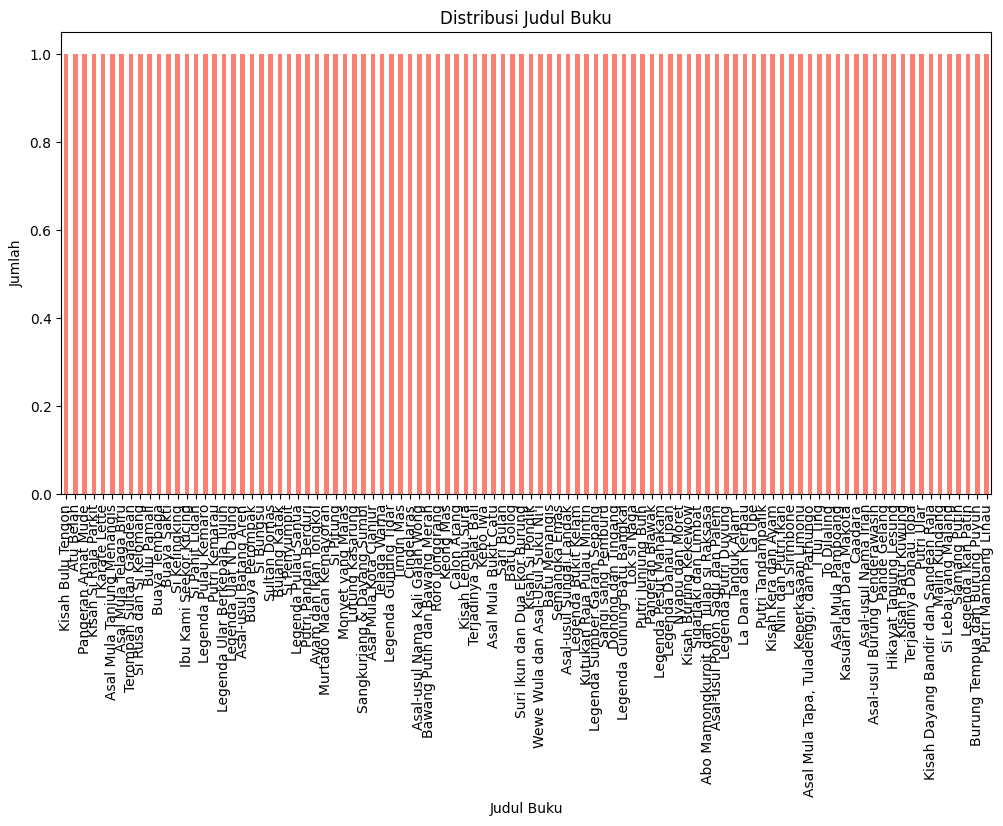

In [17]:
# Contoh plot
plot_books_by_title()

### Melatih Model Rekomendasi Menggunakan SVD dan Evaluasi

> Menggunakan 'scikit-surprise' untuk melatih model rekomendasi dengan SVD dan mengevaluasi performa model.



In [24]:
from surprise import Dataset, Reader, SVD
from surprise.model_selection import cross_validate, KFold
from surprise import accuracy

# Pastikan nama kolom sesuai dengan dataset Anda
user_col = 'karakter-utama'  # Ganti dengan nama kolom karakter-utama yang sesuai
item_col = 'judul'  # Ganti dengan nama kolom item_id yang sesuai
rating_col = 'penulis'  # Ganti dengan nama kolom rating yang sesuai

# Membuat dataset dari dataframe
reader = Reader(rating_scale=(1, 5))  # Sesuaikan skala rating jika berbeda
ratings_data = pd.DataFrame({
    'userID': data[user_col],
    'itemID': data[item_col],
    'rating': data[rating_col]
})

# Mengonversi kolom 'penulis' menjadi rating numerik
ratings_data['rating'] = ratings_data['rating'].astype('category').cat.codes

dataset = Dataset.load_from_df(ratings_data[['userID', 'itemID', 'rating']], reader)


In [25]:
# Melatih model SVD
svd = SVD()
cv_results = cross_validate(svd, dataset, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# Menampilkan hasil validasi silang
print(f"Average RMSE: {cv_results['test_rmse'].mean()}")
print(f"Average MAE: {cv_results['test_mae'].mean()}")


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    19.1377 24.9690 18.6588 22.1811 22.0885 21.4070 2.3002  
MAE (testset)     14.0500 21.5500 15.1500 18.0000 18.8000 17.5100 2.6746  
Fit time          0.00    0.00    0.00    0.00    0.00    0.00    0.00    
Test time         0.00    0.00    0.00    0.00    0.00    0.00    0.00    
Average RMSE: 21.406989919550835
Average MAE: 17.509999999999998


In [26]:
# Fit seluruh data
trainset = dataset.build_full_trainset()
svd.fit(trainset)

In [27]:
# Fungsi untuk merekomendasikan item berdasarkan model SVD
def svd_recommendations(user_id, num_recommendations=10):
    items = data['judul'].unique()
    predictions = [svd.predict(user_id, item) for item in items]
    predictions = sorted(predictions, key=lambda x: x.est, reverse=True)
    top_predictions = predictions[:num_recommendations]
    top_items = [pred.iid for pred in top_predictions]
    return top_items

In [28]:
# Contoh mendapatkan rekomendasi berdasarkan user_id
print(svd_recommendations('user_1'))

['Atu Belah', 'Pangeran Amat Mude', 'Kisah Si Raja Parkit', 'Terjadinya Danau Toba', 'Putri Ular', 'Kisah Dayang Bandir dan Sandean Raja', 'Malin Kundang', 'Si Lebai yang Malang', 'Siamang Putih', 'Legenda Ikan Patin']


In [29]:
def precision_recall_f1(predictions, threshold=3.5):
    tp = sum((pred.r_ui >= threshold) and (pred.est >= threshold) for pred in predictions)
    fp = sum((pred.r_ui < threshold) and (pred.est >= threshold) for pred in predictions)
    fn = sum((pred.r_ui >= threshold) and (pred.est < threshold) for pred in predictions)
    tn = sum((pred.r_ui < threshold) and (pred.est < threshold) for pred in predictions)

    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return precision, recall, f1

kf = KFold(n_splits=5)
precisions, recalls, f1_scores = [], [], []

for trainset, testset in kf.split(dataset):
    svd.fit(trainset)
    predictions = svd.test(testset)
    precision, recall, f1 = precision_recall_f1(predictions)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

print(f"Average Precision: {sum(precisions)/len(precisions)}")
print(f"Average Recall: {sum(recalls)/len(recalls)}")
print(f"Average F1-Score: {sum(f1_scores)/len(f1_scores)}")

Average Precision: 0.96
Average Recall: 1.0
Average F1-Score: 0.9794871794871796


### Mengatur API Flask

> Mendefinisikan aplikasi Flask dan mengimplementasikan endpoint rekomendasi dengan filtering genre opsional.



In [ ]:
from flask import Flask, request, jsonify

app = Flask(__name__)

@app.route('/recommend', methods=['GET'])
def recommend():
    title = request.args.get('title')
    genre_filter = request.args.get('genre')
    recommendations = get_recommendations(title, genre_filter).tolist()
    return jsonify(recommendations)

@app.route('/svd_recommend', methods=['GET'])
def svd_recommend():
    user_id = request.args.get('user_id')
    recommendations = svd_recommendations(user_id)
    return jsonify(recommendations)

if __name__ == '__main__':
    app.run(port=5000)


### Mengekspos API Flask menggunakan ngrok

> Mengatur 'ngrok' dengan token autentikasi Anda dan menjalankan aplikasi Flask.




In [ ]:
from pyngrok import ngrok

# Ganti ini dengan token autentikasi ngrok Anda yang sebenarnya
NGROK_AUTH_TOKEN = "YOUR_NGROK_AUTH_TOKEN"
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

# Mengatur tunnel
public_url = ngrok.connect(5000)
print(f"Public URL: {public
